In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = (17, 8)

In [3]:
RESULT_ROOT = Path('results')
result_dir = {folder.name: folder for folder in RESULT_ROOT.iterdir() if folder.is_dir()}

for name, folder in result_dir.items():
    result_dir[name] = {sub_dir.name: sub_dir for sub_dir in folder.iterdir()}

in_domain_paths = result_dir['in-domain']
general_model_paths = result_dir['general_model']

In [4]:
def load_result_df(result_dir, method_label):
    result = pd.DataFrame()
    for file in result_dir.glob('*.csv'):
        tmp = pd.read_csv(file)
        result = pd.concat([result, tmp], axis='index')
    result.model_name = result.model_name.map(lambda x: f'{x}-{method_label}')
    return result

In [5]:
in_rf_result = load_result_df(method_label='in-domain', result_dir=in_domain_paths['RandomForestRegressor'])
in_lbg_result = load_result_df(method_label='in-domain', result_dir=in_domain_paths['LGBMRegressor'])
in_svm_result = load_result_df(method_label='in-domain', result_dir=in_domain_paths['LinearSVR'])
in_domain_df = pd.concat([in_lbg_result, in_rf_result, in_svm_result], axis='index')

In [6]:
gen_rf_result = load_result_df(method_label='general', result_dir=general_model_paths['RandomForestRegressor'])
gen_lbg_result = load_result_df(method_label='general', result_dir=general_model_paths['LGBMRegressor'])
gen_svm_result = load_result_df(method_label='general', result_dir=general_model_paths['LinearSVR'])
gen_domain_df = pd.concat([gen_rf_result, gen_lbg_result, gen_svm_result], axis='index')
result = pd.concat([gen_domain_df, in_domain_df], axis='index')
# result.time = result.time * 1000

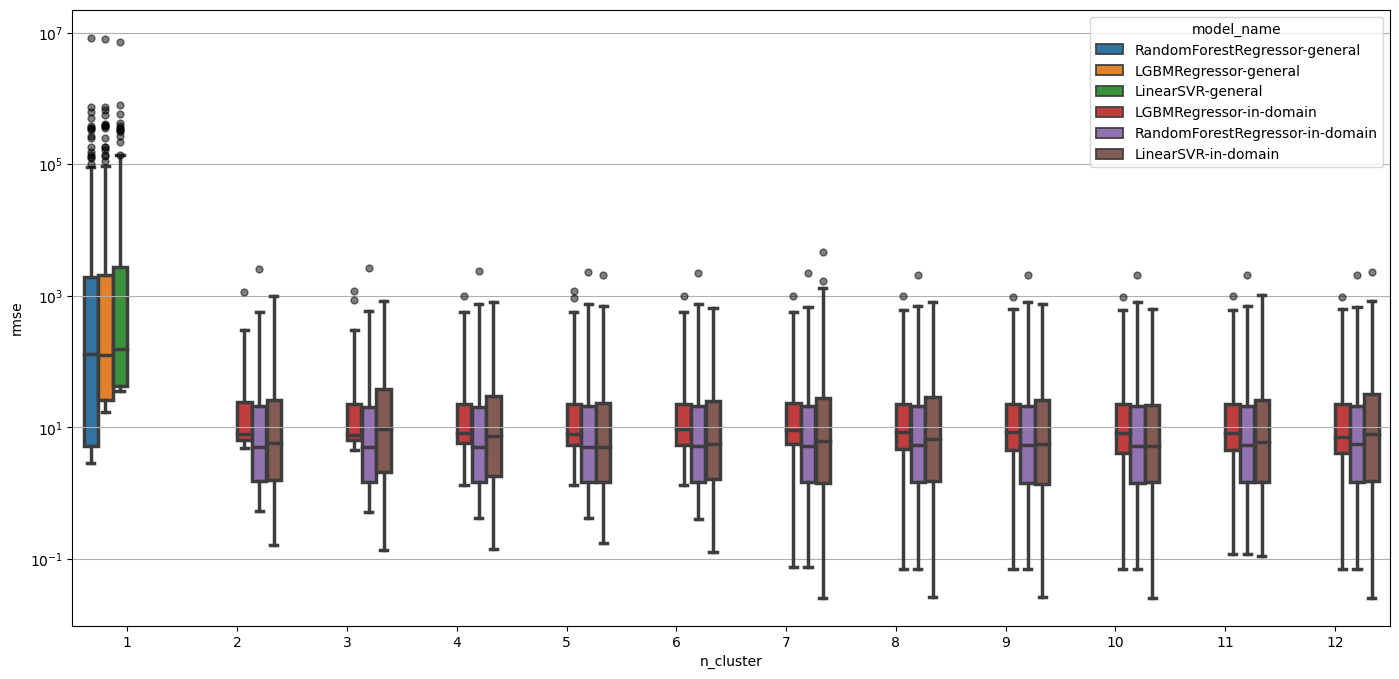

In [7]:
flierprops = dict(marker='o', markersize=5, markeredgecolor='black', markerfacecolor='black', alpha=0.5)
sns.boxplot(data=result, x='n_cluster', y='rmse', hue='model_name', linewidth=2.5, dodge=True, flierprops=flierprops, whis=50)
plt.yscale('log')
plt.grid(axis='y')

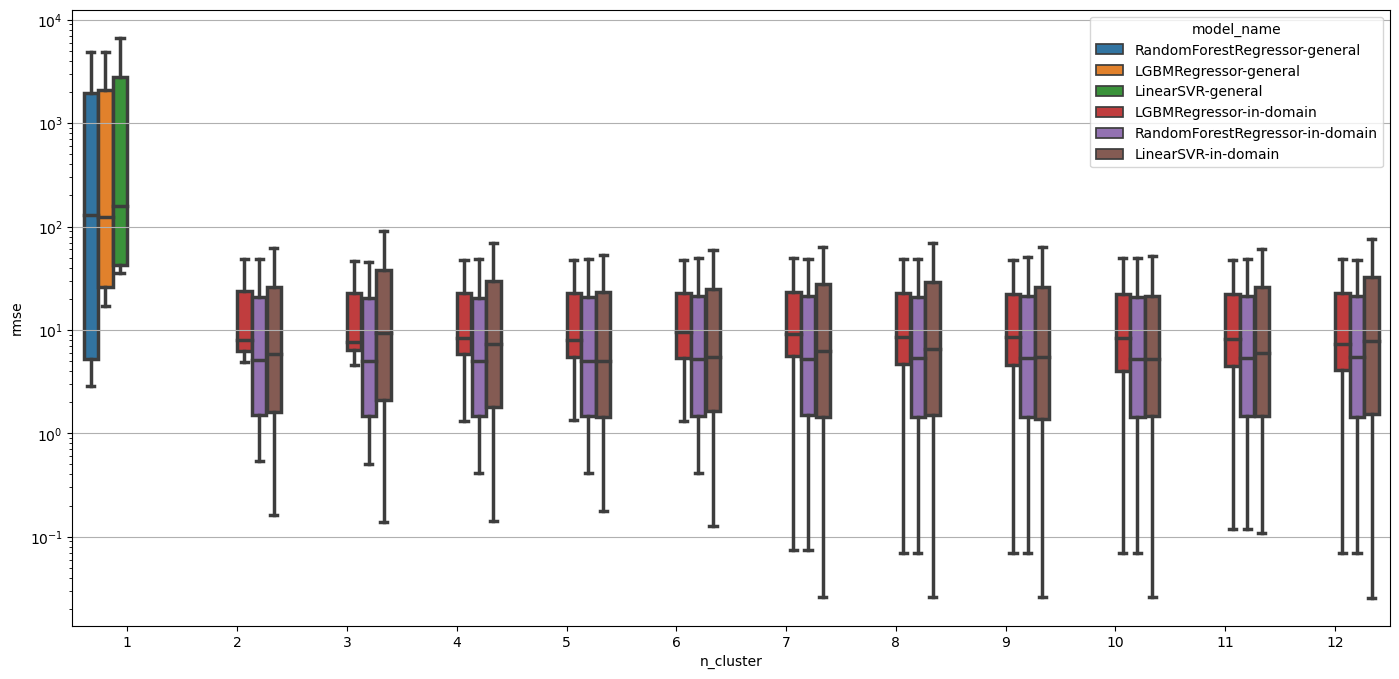

In [35]:
sns.boxplot(data=result, x='n_cluster', y='rmse', hue='model_name', linewidth=2.5, dodge=True, showfliers=False)
plt.grid(axis='y')
plt.yscale('log')

In [9]:
result

,cidades,n_cluster,cluster_idx,model_name,window_size,rmse,time
0,poa,1,0,RandomForestRegressor-general,6,5.663778,19
1,jaboatao-dos-guararapes,1,0,RandomForestRegressor-general,6,3.257942,19
2,juazeiro,1,0,RandomForestRegressor-general,6,3.363723,19
3,itacoatiara,1,0,RandomForestRegressor-general,6,2258.297475,19
4,limeira,1,0,RandomForestRegressor-general,6,6.775400,19
...,...,...,...,...,...,...,...
24,vitoria-da-conquista,8,4,LinearSVR-in-domain,6,53.385598,0
25,toledo,8,4,LinearSVR-in-domain,6,66.302001,0
26,simoes-filho,8,4,LinearSVR-in-domain,6,8.669962,0
27,foz-do-iguacu,8,4,LinearSVR-in-domain,6,320.315199,0


/var/folders/zp/12jqqjln6qdgg08yb4x3z2x00000gn/T/ipykernel_16058/4079720609.py:47: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


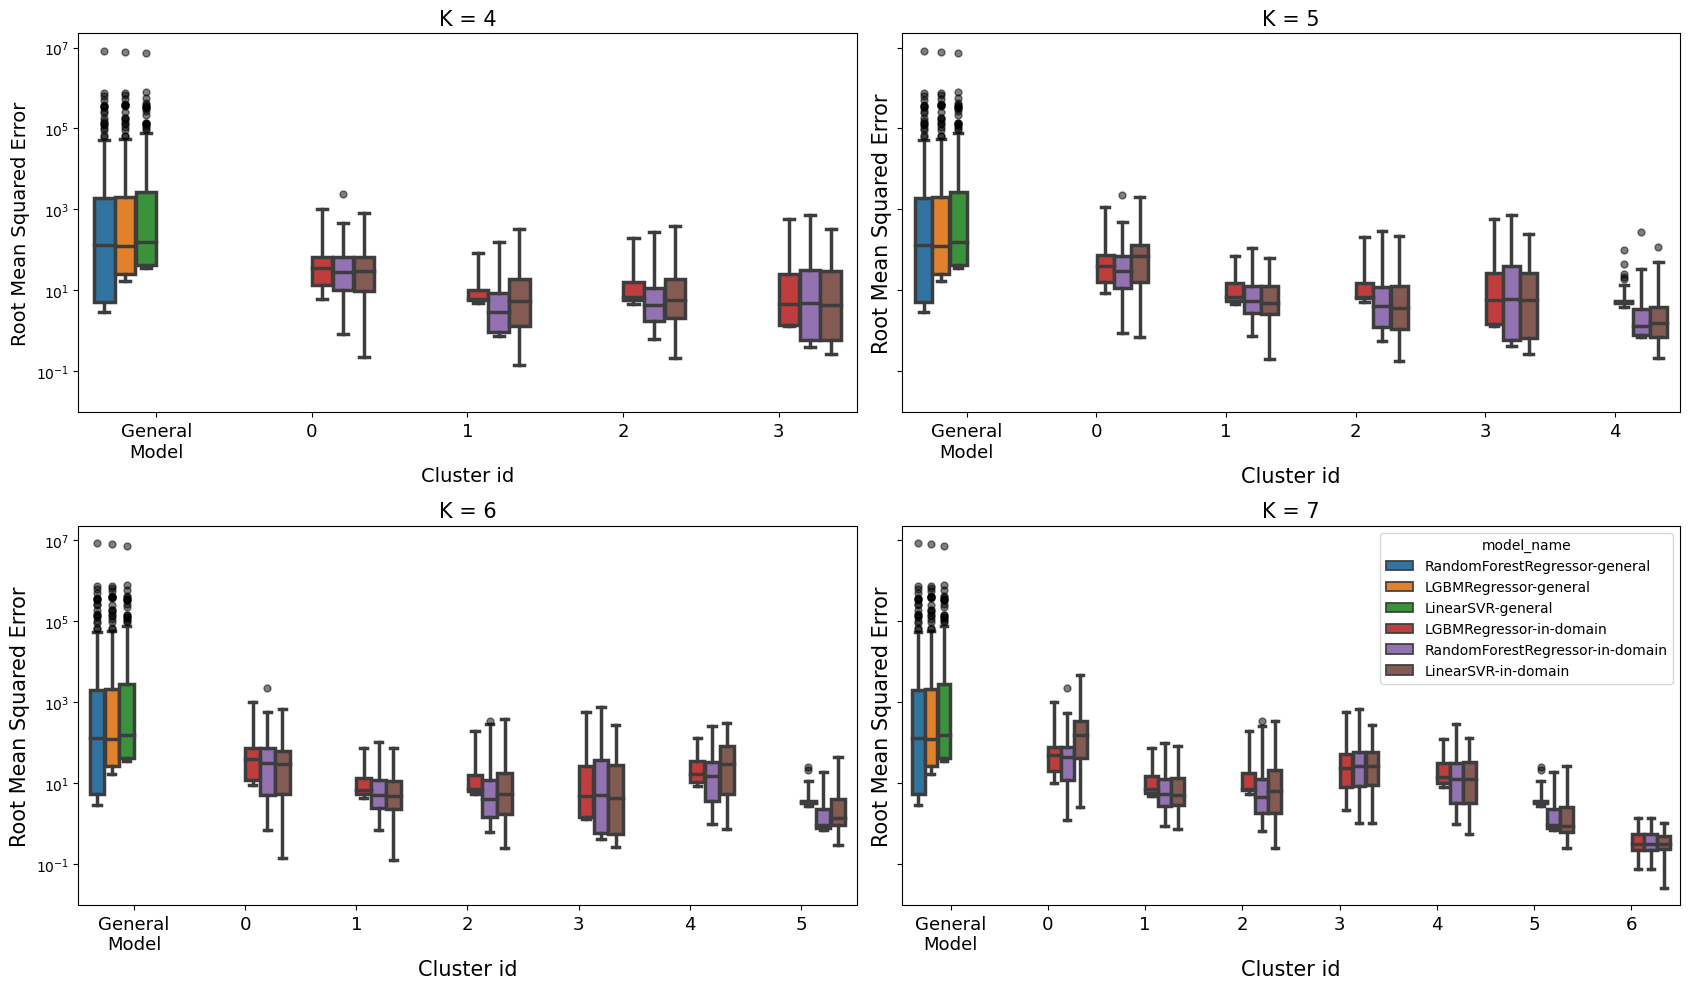

In [257]:
result.cluster_idx = result.apply(lambda x: -1 if x['n_cluster'] == 1 else x['cluster_idx'], axis='columns')

fix, ax = plt.subplots(2,2, figsize=(17, 10), sharey=True, layout='constrained')

sns.boxplot(
    data=result[(result.n_cluster==4) | (result.n_cluster==1)], x='cluster_idx', y='rmse', 
    hue='model_name', linewidth=2.5, dodge=True, flierprops=flierprops, whis=30, ax=ax[0,0])
ax[0,0].set_xticklabels(['General\nModel', '0','1', '2', '3'], fontsize=13)
ax[0,0].legend([], frameon=False)
ax[0,0].set_ylabel('Root Mean Squared Error', fontsize=14)
ax[0,0].set_xlabel('Cluster id', fontsize=14)
ax[0,0].set_title('K = 4', fontsize=15)

sns.boxplot(
    data=result[(result.n_cluster==5) | (result.n_cluster==1)], x='cluster_idx', y='rmse', 
    hue='model_name', linewidth=2.5, dodge=True, flierprops=flierprops, whis=30, ax=ax[0,1])
ax[0,1].set_xticklabels(['General\nModel', '0','1', '2', '3', '4'], fontsize=13)
ax[0,1].legend([], frameon=False)
ax[0,1].set_ylabel('Root Mean Squared Error', fontsize=15)
ax[0,1].set_xlabel(None, fontsize=15)
ax[0,1].set_xlabel('Cluster id', fontsize=15)
ax[0,1].set_title('K = 5', fontsize=15)


sns.boxplot(
    data=result[(result.n_cluster==6) | (result.n_cluster==1)], x='cluster_idx', y='rmse', 
    hue='model_name', linewidth=2.5, dodge=True, flierprops=flierprops, whis=30, ax=ax[1,0])
ax[1,0].set_xticklabels(['General\nModel', '0','1', '2', '3', '4', '5'], fontsize=13)
ax[1,0].legend([], frameon=False)
ax[1,0].set_ylabel('Root Mean Squared Error', fontsize=15)
ax[1,0].set_xlabel(None, fontsize=15)
ax[1,0].set_xlabel('Cluster id', fontsize=15)
ax[1,0].set_title('K = 6', fontsize=15)


sns.boxplot(
    data=result[(result.n_cluster==7) | (result.n_cluster==1)], x='cluster_idx', y='rmse', 
    hue='model_name', linewidth=2.5, dodge=True, flierprops=flierprops, whis=30, ax=ax[1,1])
ax[1,1].set_xticklabels(['General\nModel', '0','1', '2', '3', '4', '5', '6'], fontsize=13)
ax[1,1].set_ylabel('Root Mean Squared Error', fontsize=15)
ax[1,1].set_xlabel(None, fontsize=15)
ax[1,1].set_xlabel('Cluster id', fontsize=15)
ax[1,1].set_title('K = 7', fontsize=15)


plt.yscale('log')
plt.tight_layout()
plt.savefig('figures/rmse_cluster.png')
plt.show()

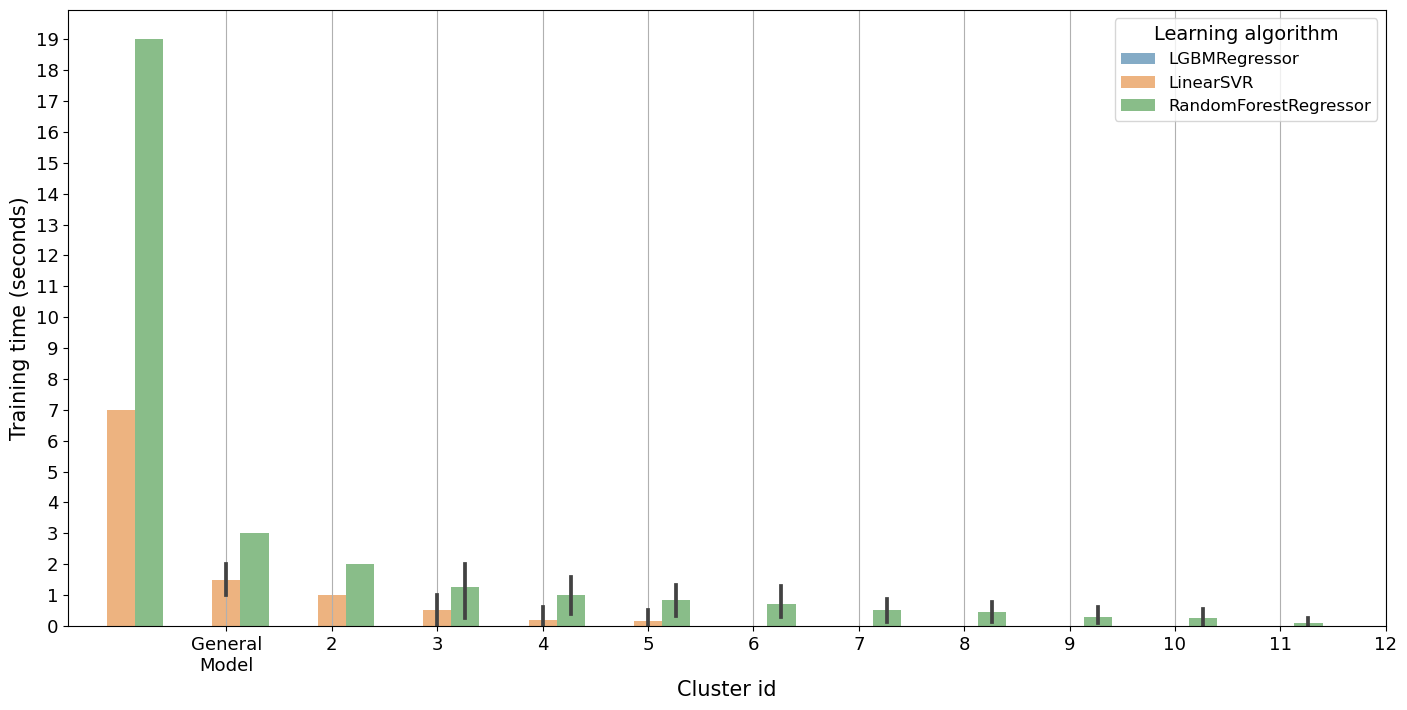

In [256]:
t = result.drop(['cidades', 'rmse', 'window_size'], axis='columns').groupby(['n_cluster', 'cluster_idx','model_name'], as_index=False).max()
t['learner'] = t.model_name.str.replace(pat=r'-[a-z]+', repl='', case=True, regex=True)

sns.barplot(data=t, y='time', x='n_cluster', hue='learner',alpha=.6)

plt.xticks(range(1, 13), ['General\nModel', 2,3,4,5,6,7,8,9,10,11,12], fontsize=13)
plt.xlabel('Cluster id', fontsize=15)
plt.yticks(range(0, 20), fontsize=13)
plt.ylabel('Training time (seconds)', fontsize=15)
plt.legend(title='Learning algorithm', title_fontsize=14, fontsize=12)
plt.grid(axis='x')
plt.show()